<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Распределение-Парето" data-toc-modified-id="Распределение-Парето-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Распределение Парето</a></span></li><li><span><a href="#Проверка-ЦПТ" data-toc-modified-id="Проверка-ЦПТ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Проверка ЦПТ</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## Распределение Парето

Сгенерируем выборку размера 1000 из непрерывного распределения Парето.

In [3]:
k = 3 #параметр распределения
cd = sts.pareto(k)
sample = cd.rvs(1000)

Сравним гистограмму данного распределения с теоретической плотностью вероятности.

Text(0.5,0,'$x$')

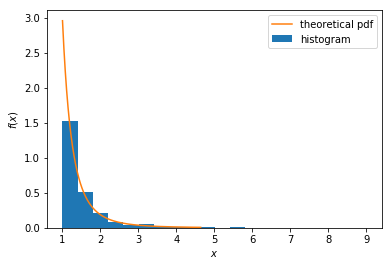

In [4]:
plt.hist(sample, density=True, bins=20, label='histogram')

x = np.linspace(cd.ppf(0.01), cd.ppf(0.99),1000)
pdf = cd.pdf(x)
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

## Проверка ЦПТ

In [5]:
mean_5 = []
mean_10 = []
mean_50 = []

In [6]:
for i in range(0, 1000):
    mean_5.append(sts.pareto(k).rvs(5).mean())
    mean_10.append(sts.pareto(k).rvs(10).mean())
    mean_50.append(sts.pareto(k).rvs(50).mean())

Подсчет среднего и дисперсии для распределения Парето

In [15]:
m = k / (k - 1)
sigma = k / ((k - 1) * (k - 1) * (k - 2)) # дисперсия

print(m, sigma)

1.5 0.75


In [21]:
mean, var, skew, kurt = sts.pareto.stats(k, moments='mvsk')
                                                        
print(mean, var)

1.5 0.75


Гистограмма выборочных средних для выборки n=5

Text(0.5,0,'$x$')

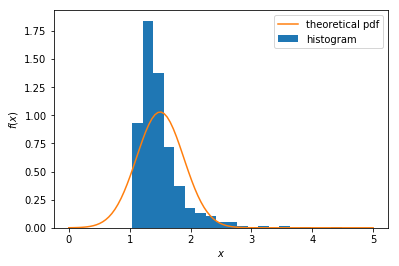

In [27]:
plt.hist(mean_5, density=True, bins=20, label='histogram')

norm_rv = sts.norm(m, np.sqrt(sigma / 5))
x = np.linspace(0,5,100)
plt.plot(x, norm_rv.pdf(x), label='theoretical pdf')

plt.legend()

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Гистограмма выборочных средних для выборки n=10

Text(0.5,0,'$x$')

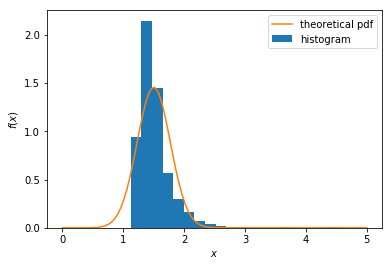

In [30]:
plt.hist(mean_10, density=True, bins=20, label='histogram')

norm_rv = sts.norm(m, np.sqrt(sigma / 10))
x = np.linspace(0,5,100)
plt.plot(x, norm_rv.pdf(x), label='theoretical pdf')

plt.legend()

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Гистограмма выборочных средних для выборки n=50

Text(0.5,0,'$x$')

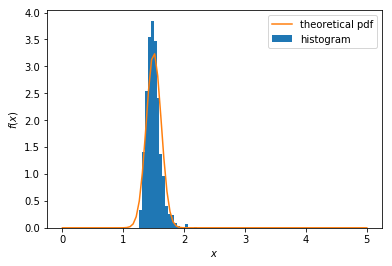

In [31]:
plt.hist(mean_50, density=True, bins=20, label='histogram')
norm_rv = sts.norm(m, np.sqrt(sigma / 50))
x = np.linspace(0,5,100)
plt.plot(x, norm_rv.pdf(x), label='theoretical pdf')

plt.legend()

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

## Вывод

Чем больше значение n, тем больше распределение выборочных средних похоже на нормальное.